# Flight Price Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Clean_Dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.shape

(300153, 12)

In [11]:
df=df.drop(['Unnamed: 0'],axis=1)

In [17]:
df.describe()  #nimerical column stats

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [19]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [20]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
#except price there are total 10 features so we will start visyalizing data of each feature

# data visualization

In [21]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

[Text(0.5, 0, 'airline'), Text(0, 0.5, 'Frequency of airline')]

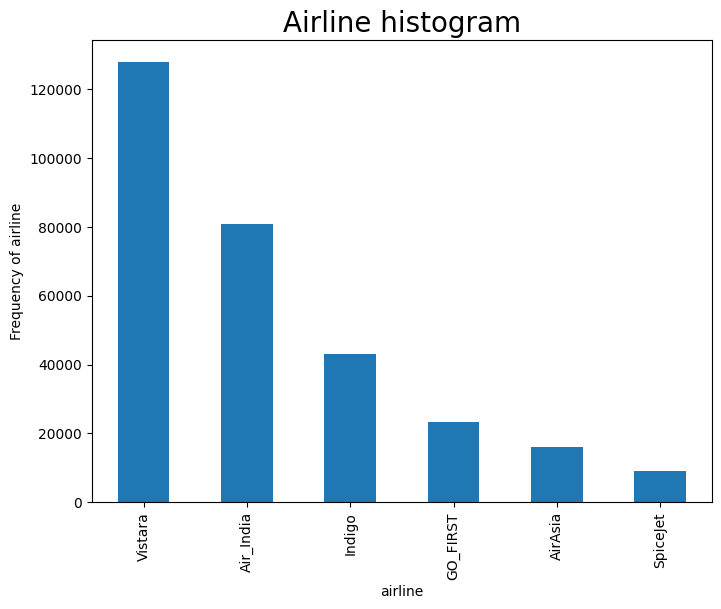

In [25]:
plt.figure(figsize=(8, 6))
plt1=df['airline'].value_counts().plot(kind='bar')
plt.title('Airline histogram', fontsize=20)
plt1.set(xlabel = 'airline', ylabel='Frequency of airline')

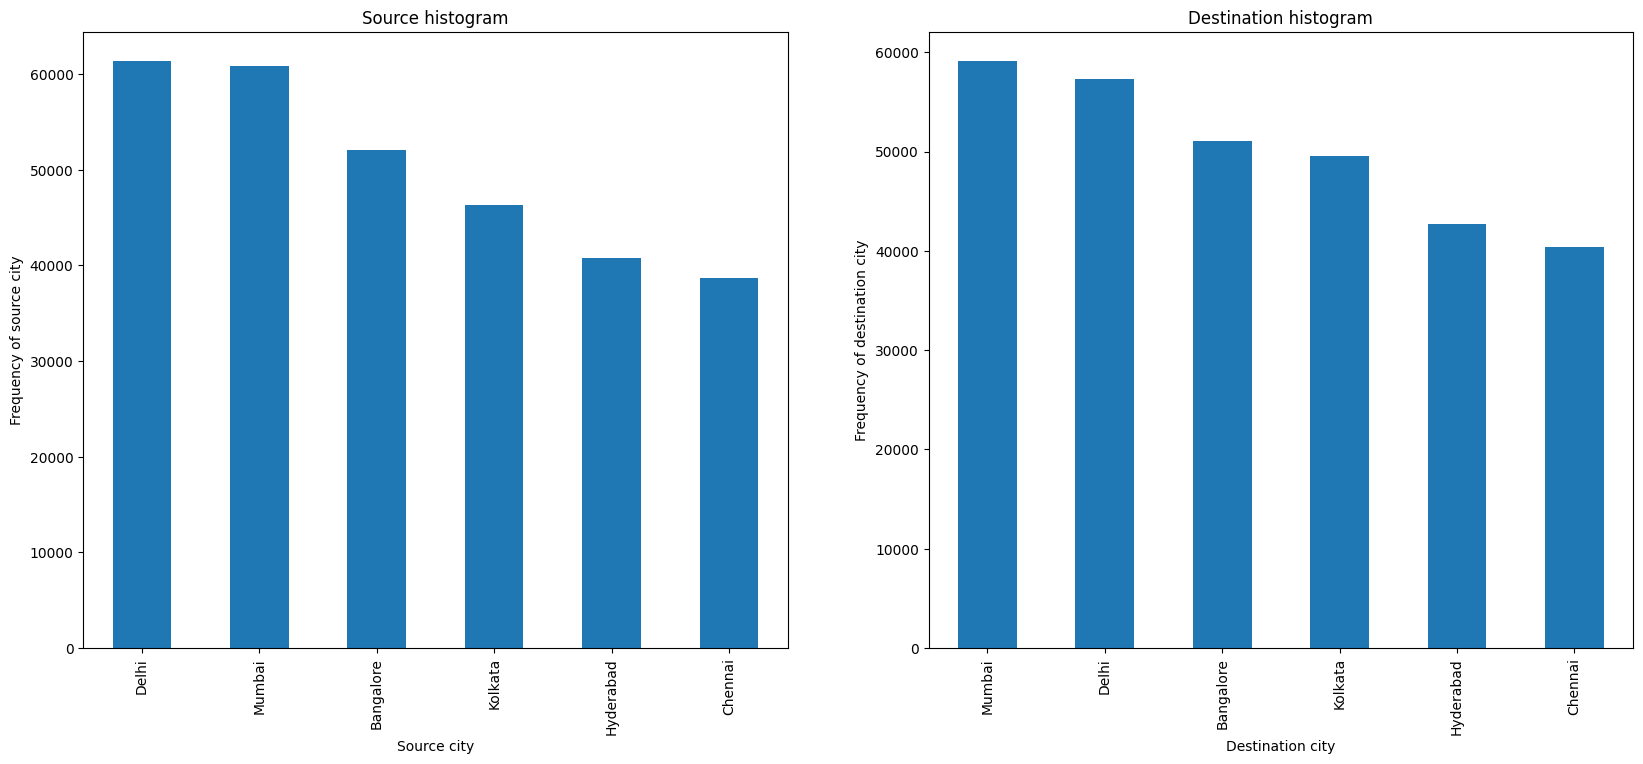

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Source histogram')
plt1 = df['source_city'].value_counts().plot(kind='bar')
plt1.set(xlabel = 'Source city', ylabel='Frequency of source city')

plt.subplot(1,2,2)
plt.title('Destination histogram')
plt1 = df['destination_city'].value_counts().plot(kind='bar')
plt1.set(xlabel = 'Destination city', ylabel='Frequency of destination city')
plt.show()

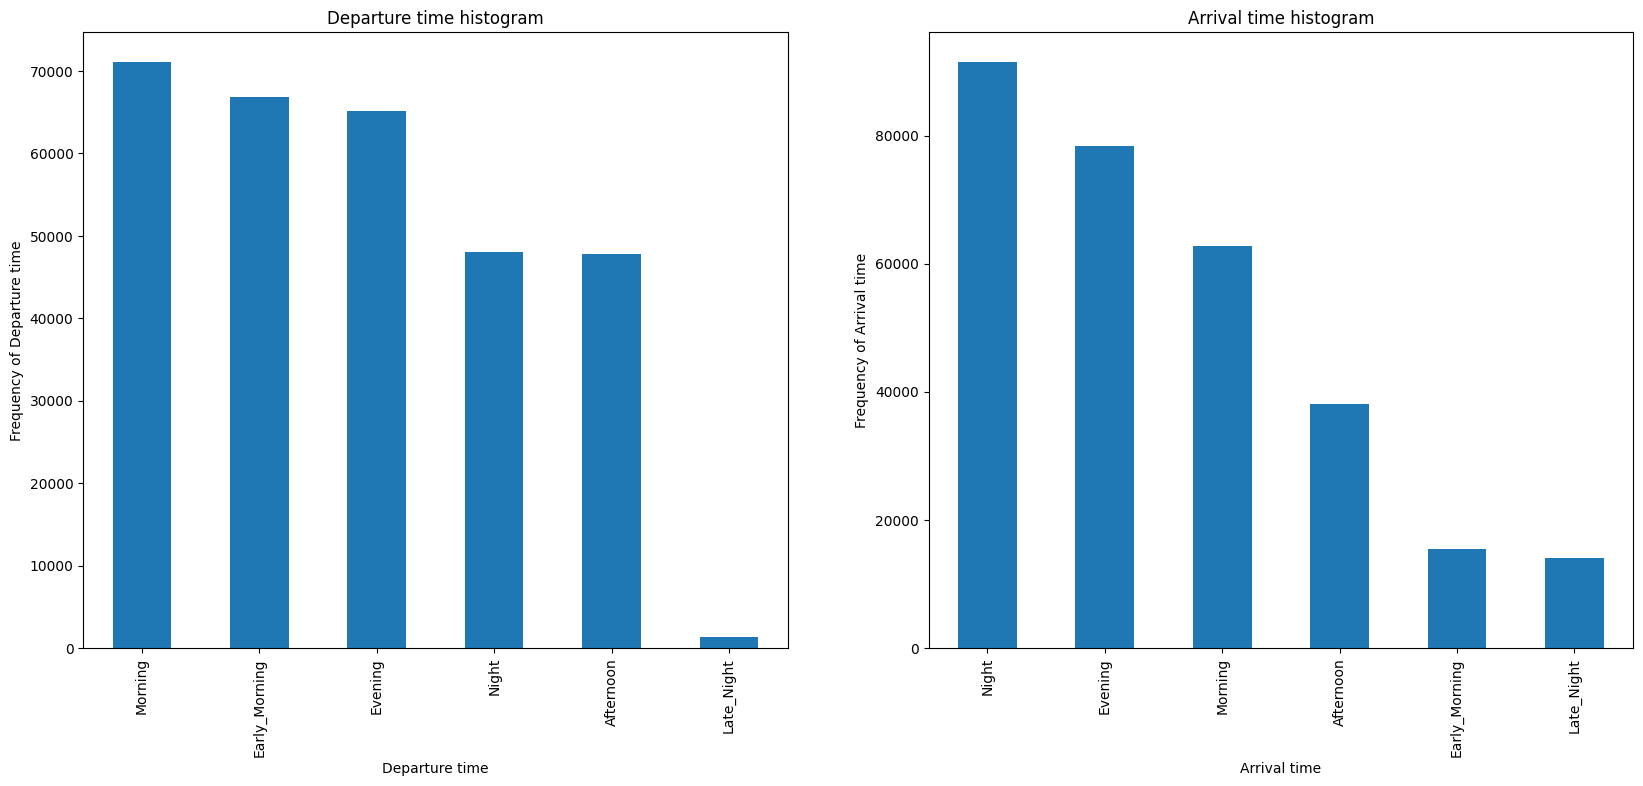

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Departure time histogram')
plt1 = df.departure_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Departure time', ylabel='Frequency of Departure time')

plt.subplot(1,2,2)
plt.title('Arrival time histogram')
plt1 = df.arrival_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Arrival time', ylabel='Frequency of Arrival time')
plt.show()

#Most of the departing flights are in the morning and most arrival flights are during night. 
#Very few Late night departure and arrival of flights.

In [35]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

<AxesSubplot: title={'center': 'class vs price'}, xlabel='class', ylabel='price'>

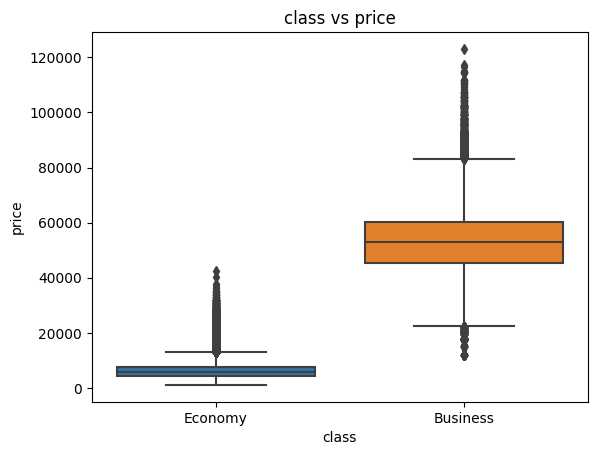

In [56]:
plt.title('class vs price')
sns.boxplot(x='class',y='price',data=df)


In [58]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

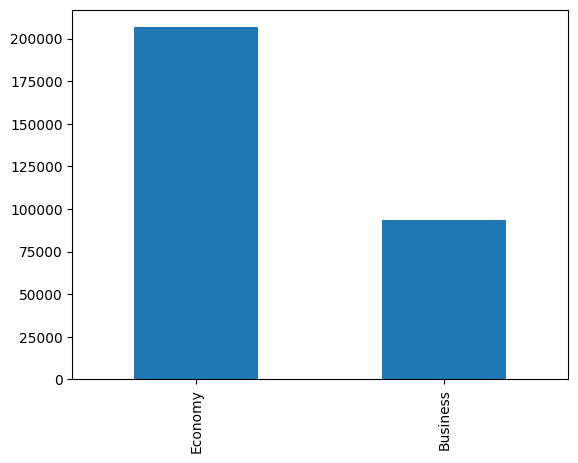

In [59]:

plt1 = df['class'].value_counts().plot(kind='bar')

In [60]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [61]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

Text(0.5, 1.0, 'average airline price')

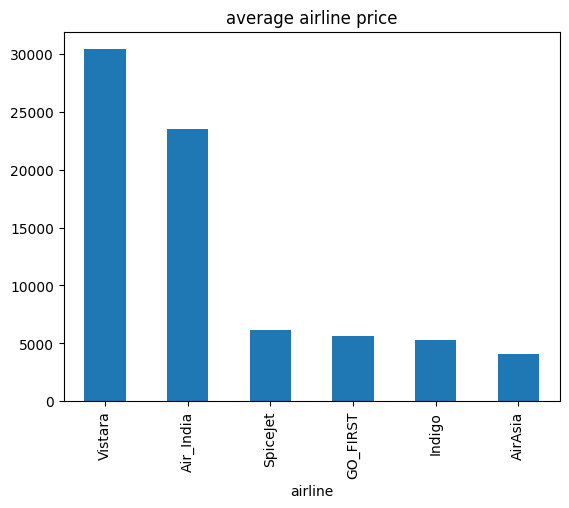

In [62]:
df.groupby('airline')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('average airline price')



<AxesSubplot: xlabel='airline', ylabel='price'>

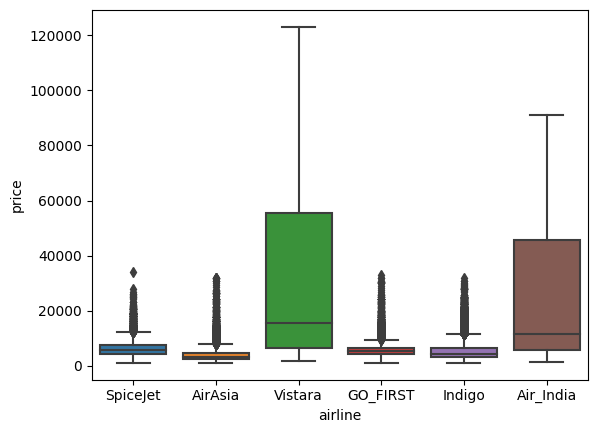

In [65]:
sns.boxplot(x='airline',y='price',data=df)

##Average price of Vistara flight is highest while that of AirAsia is the lowest.

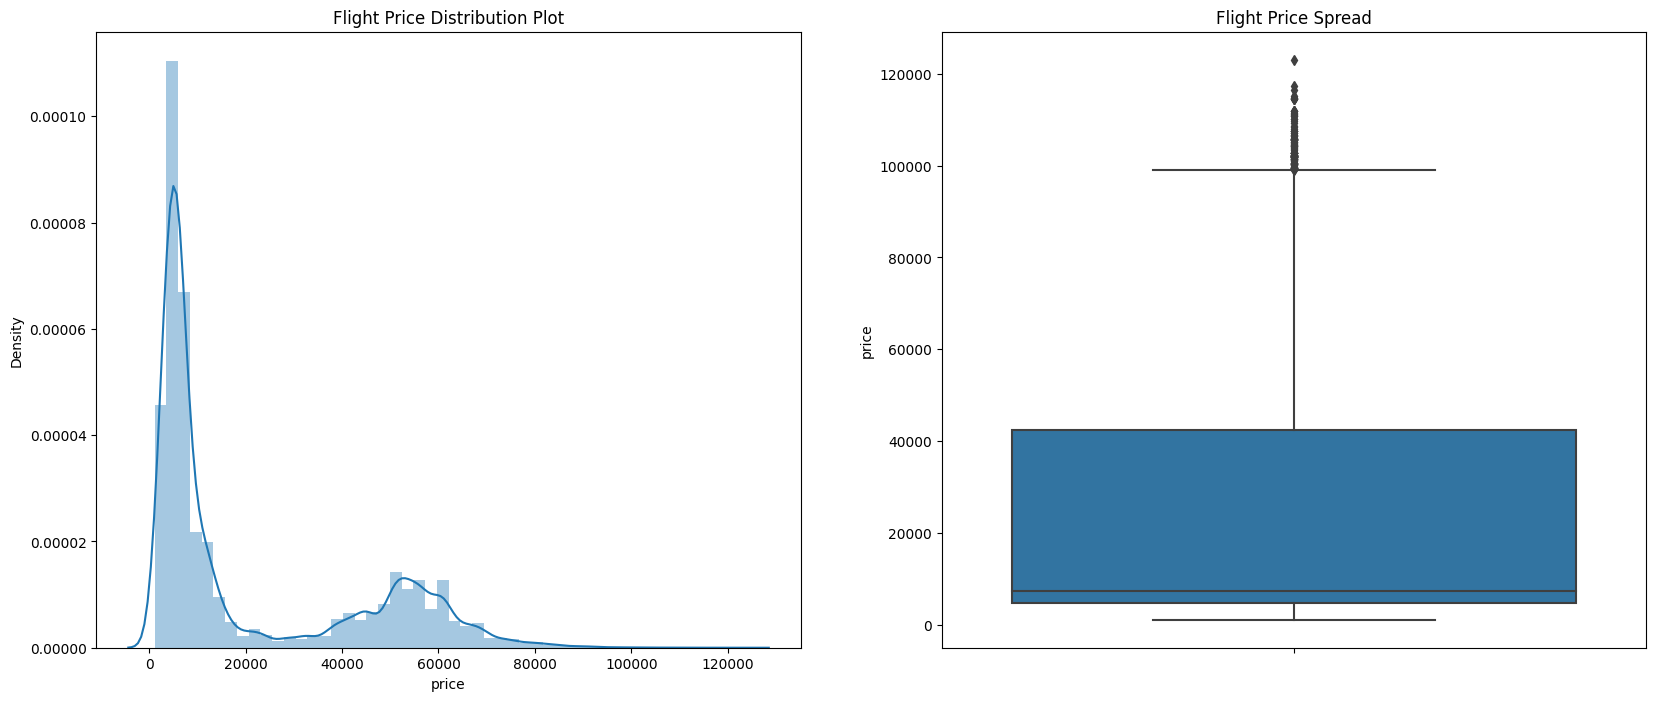

In [66]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Flight Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [67]:
df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

#Median flight price is much less than the average flight price

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
85%       53743.000000
90%       57920.000000
100%     123071.000000
max      123071.000000
Name: price, dtype: float64

In [68]:
df.days_left.nunique()

49

In [69]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [74]:
gb1=df.groupby(['source_city','destination_city','days_left'])['price'].mean()

In [76]:
gb1=gb1.reset_index()

In [78]:
gb1['combined_col'] = gb1['source_city'] + '_' + gb1['destination_city']

In [79]:
gb1.combined_col.nunique()

30

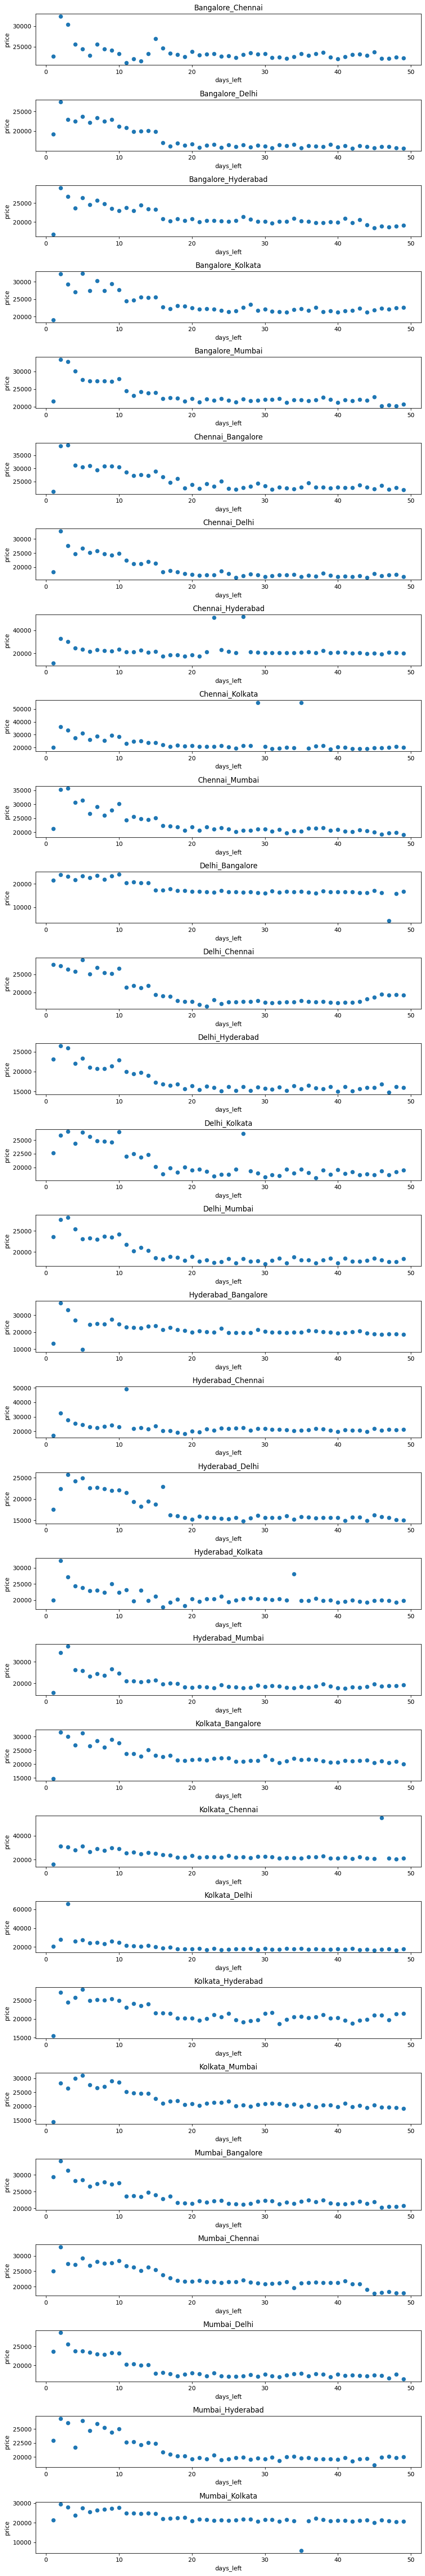

In [81]:
plt.figure(figsize=(10,60))
for indx, val in enumerate(gb1.combined_col.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = gb1.loc[gb1['combined_col'] == val]
    plt.scatter(temp_df['days_left'], temp_df['price'])
    plt.title(val)
    plt.xlabel('days_left')
    plt.ylabel('price')

plt.tight_layout()


#Prices are low when a ticket is booked many days before the departure and price increases as the days left get reduced. 
#Also there is a drop in prices one day before the departure

In [85]:
df['price_per_minute'] = df['price']/df['duration']*60

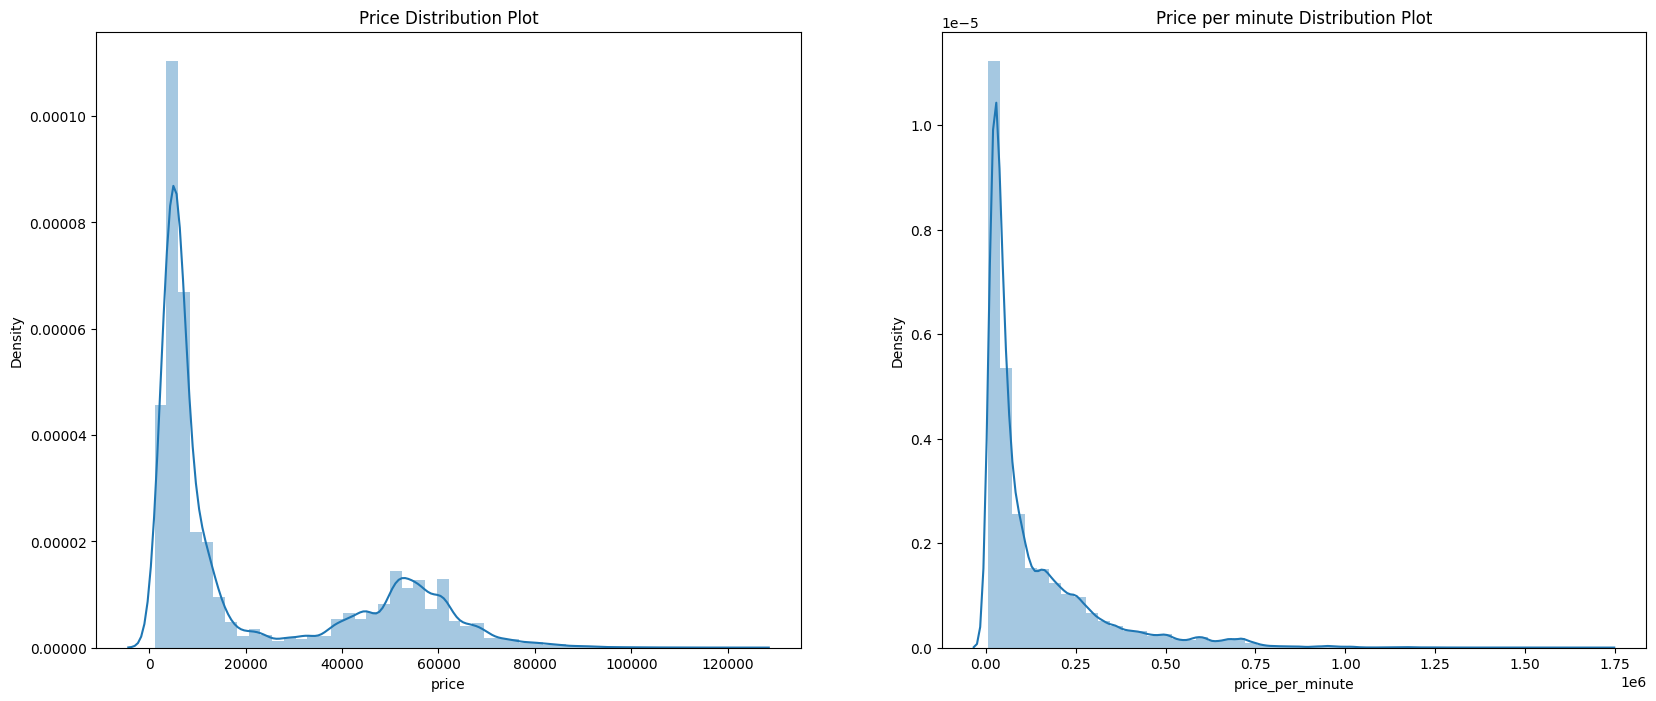

In [86]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Price per minute Distribution Plot')
sns.distplot(df.price_per_minute)

plt.show()

In [89]:
#now create  a journey column
df['journey']=df['source_city']+':'+df['destination_city']

In [93]:
df['price']

corr_matx=df.corr()
corr_matx['price']

duration            0.204222
days_left          -0.091949
price               1.000000
price_per_minute    0.665607
Name: price, dtype: float64

In [95]:
#drop unwanted columns
df=df.drop(['flight'],axis=1)

In [98]:
df=df.drop(['source_city','destination_city'],axis=1)

In [113]:
df['shift']=df['departure_time'] +':'+df['arrival_time']

In [114]:
df=df.drop(['departure_time','arrival_time'],axis=1)

In [213]:
df1=pd.get_dummies(df,drop_first=True)

In [214]:
df1

,duration,days_left,price,price_per_minute,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,stops_two_or_more,...,shift_Morning:Evening,shift_Morning:Late_Night,shift_Morning:Morning,shift_Morning:Night,shift_Night:Afternoon,shift_Night:Early_Morning,shift_Night:Evening,shift_Night:Late_Night,shift_Night:Morning,shift_Night:Night
0,2.17,1,5953,164599.078341,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.33,1,5953,153296.137339,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.17,1,5956,164682.027650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.25,1,5955,158800.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.33,1,5955,153347.639485,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,412291.666667,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
300149,10.42,49,77105,443982.725528,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
300150,13.83,49,79099,343162.689805,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
300151,10.00,49,81585,489510.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# feature scaling

In [215]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['duration', 'days_left','price','price_per_minute']
df1[num_vars] = scaler.fit_transform(df1[num_vars])

# Modeling -linear regression

In [280]:
x=df1.drop(['price'],axis=1)
y=df1.iloc[:,2]

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [218]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [219]:
y_pred = regressor.predict(X_test)

In [222]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# MSE
print("MSE: ", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, y_pred))

MSE:  0.0029380525399189217
RMSE:  0.054203805585207036
MAE:  0.19277387586083627
R2 Score:  0.9145237125670184


# Kfold Cross Validation on all the models(Using a kfold of size = 5)

In [235]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [239]:
#importing all the models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [240]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["RandomForestRegressor"]={"model":RandomForestRegressor(n_estimators=50,max_depth=10)}
models['GradientBoostingRegressor'] = {'model':GradientBoostingRegressor(n_estimators=50,max_depth=10)}

# Automatic Kfold Cross validation

In [242]:
#cross validation to get the best model
cv = KFold(n_splits=5)
for key,item in models.items():
    reg_model = item['model']
    print(item['model'])
    score = cross_val_score(estimator=reg_model,X = x,y = y,cv=cv,scoring='r2')
    print(score)

KNeighborsRegressor(n_neighbors=50)
[-24.18 -65.14 -24.33  -0.16 -12.46]
LinearRegression()
[-3.69 -1.22 -1.15  0.83  0.13]
RandomForestRegressor(max_depth=10, n_estimators=50)
[0.96 0.97 0.97 0.99 0.52]
GradientBoostingRegressor(max_depth=10, n_estimators=50)
[1.   1.   1.   1.   0.96]


In [243]:
#graidient boosting algorithm does better in estimating, so lets explore this

reg_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=50)

In [291]:
y_pred = reg_model.predict(X_test)

In [307]:
y_pred

array([0.08, 0.54, 0.05, ..., 0.16, 0.14, 0.02])

In [308]:
y_pred.shape

(60031,)

In [309]:
y_test.shape

(60031,)

In [314]:
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  3.934432344337247e-06


In [315]:
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.9998855361960411


In [316]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  0.0019835403561151072


In [317]:
print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred)))

MAE:  0.03435739237472693


<AxesSubplot: xlabel='price'>

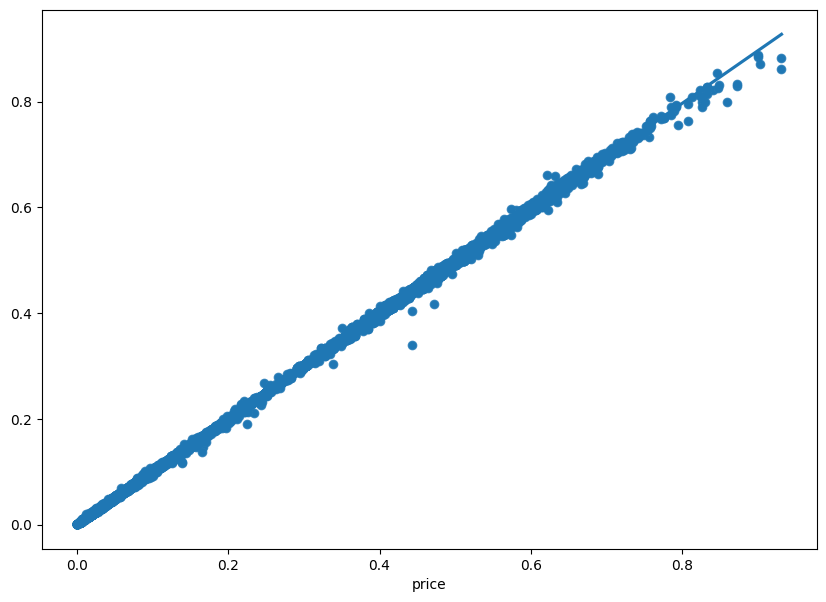

In [319]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_test,y = y_pred)
sns.regplot(x = y_test,y = y_pred)

In [ ]:
# as you can see Most of the data is along the reg fit 